# Telecom Churn Analysis

## Dataset Overview
This dataset aims to analyze customer behavior and predict churn (whether a customer will discontinue services). Here's a detailed overview:

### Dataset Structure
1. Rows (observations): 7043
2. Columns (features): 21
3. Purpose: Understand customer demographics, account information, and service usage to predict churn.

### Data Characteristics
1. Categorical Variables: Many columns such as gender, Partner, Dependents, Contract, etc., are categorical, ideal for classification analysis.
2. Numerical Variables: Columns like tenure, MonthlyCharges, and TotalCharges provide continuous data for analysis.
3. Target Variable (Churn): Binary classification target for predicting customer churn.

### Data Insights
1. Churn Analysis: The dataset contains information on customers who churned and those who did not. Understanding their characteristics can help prevent future churn.
2. Service Utilization: Features like OnlineSecurity, StreamingTV, and TechSupport provide insights into customer preferences.
3. Payment Patterns: Columns such as PaymentMethod and PaperlessBilling show how payment behavior correlates with churn.

Will conduct data cleaning and perform exploratory data analysis. The dataset is gotten from kaggle.

## Importing Necessary Libraries

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


c:\Users\hp pc\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Loading our dataset
data = pd.read_csv('churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Note**

- Not Churn = 0 = No
- Churn = 1 = Yes

- Senior citizen = 1 = Yes
- Non-senior Citizen = 0 = No

## Data Manipulation

In [3]:
# Getting the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [5]:
# Check for duplicates in the dataset
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [6]:
# Checking for missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 missing values from our total charges column.

In [7]:
# Handling missing values

data.dropna(inplace=True)

# Removing customerID
data.drop(columns='customerID', inplace=True)

# Convert the predictor variable into a binary numeric variable
data['Churn'] = data['Churn'].replace(to_replace={'Yes': 1, 'No': 0})

### Correlation

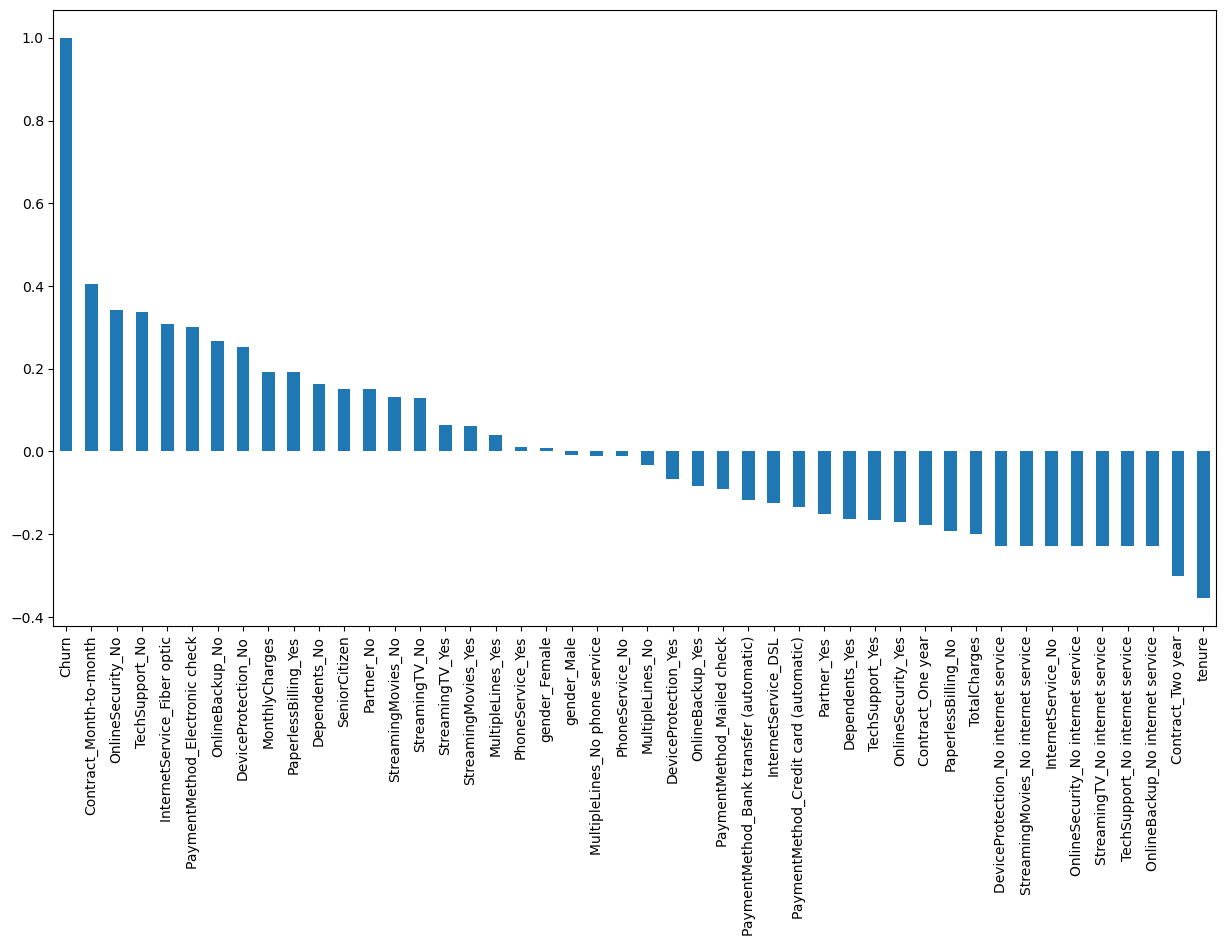

In [8]:
#Let's convert all the categorical variables into dummy variables
data_dummies = pd.get_dummies(data)

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

**Observation**

Positive Correlations:

Features like Contract_Month-to-month, OnlineSecurity_No, and TechSupport_No have strong positive correlations with Churn.

**Insights**: Customers with these attributes are more likely to churn. For example:
Customers on a month-to-month contract might find it easier to leave compared to those with longer commitments.
Lack of online security or tech support might make customers feel less satisfied.

Negative Correlations:

Features like tenure, Contract_Two_year, and InternetService_Fiber_optic have strong negative correlations with Churn.

**Insights**: Customers with higher tenure or longer contracts are less likely to churn. Similarly, those who use fiber-optic internet may have a better experience, reducing churn.

**Recommendations**
- Offering incentives to month-to-month customers to switch to longer contracts.
- Providing or enhancing online security and tech support services.

## Exploratory Data Analysis

#### Count of Customers by Churn

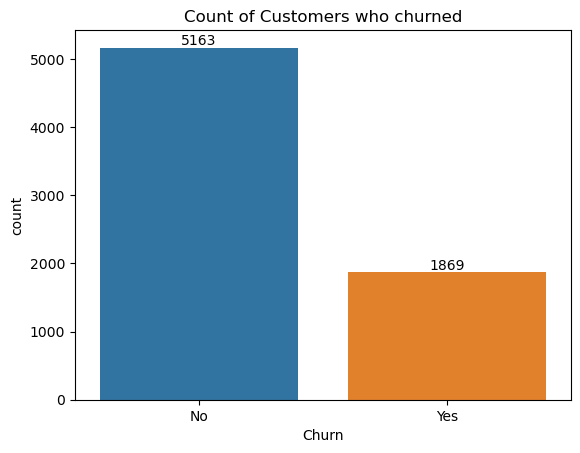

In [9]:
# Count plots of customers who churned
ax = sns.countplot(x = 'Churn', data=data)
ax.bar_label(ax.containers[0])
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.title('Count of Customers who churned')
plt.show()

**Insights**

The number of customers who did not churn outweighs the number of customers who churned.

### Percentage of churned custormers

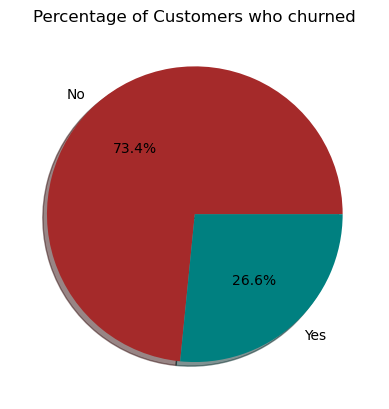

In [10]:
# Let's get the percentage of custormers who churned
churn_count = data['Churn'].value_counts()
plt.pie(churn_count, labels=['No','Yes'], autopct='%1.1f%%', shadow=True, colors=['Brown', 'Teal'])
plt.title('Percentage of Customers who churned')
plt.show()

The pie chart shows that 26% of customer churned while 73% of the customer remained loyal. 

Let's explore more to see while 26% custormer churned.


## Churn by Senior Citizen

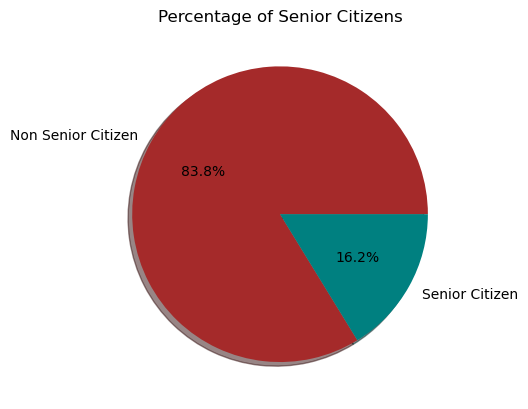

In [11]:
# Let's get the percentage of Senior Citizens
churn_percent = data['SeniorCitizen'].value_counts()
plt.pie(churn_percent, labels=['Non Senior Citizen', 'Senior Citizen'], 
        autopct='%1.1f%%', shadow=True, 
        colors=['Brown', 'Teal'])
plt.title('Percentage of Senior Citizens')
plt.show()

Only 16% of the customers are senior citizens. 83% of customers in the datasets are young.

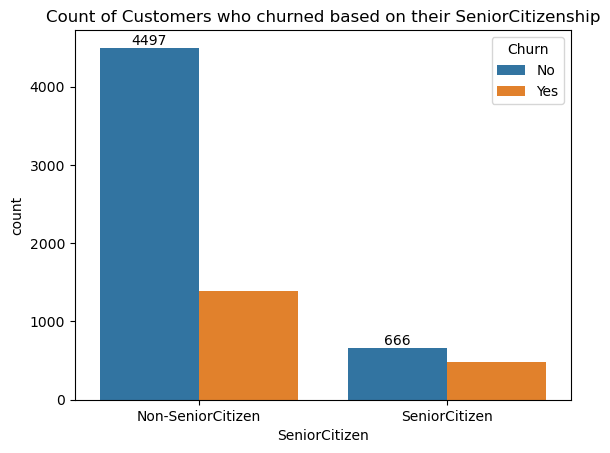

In [12]:
# Count plot of customers who churned based on their seniorcitizenship
ax = sns.countplot(x='SeniorCitizen', data=data, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers who churned based on their SeniorCitizenship')
plt.xticks(ticks=[0,1], labels=['Non-SeniorCitizen', 'SeniorCitizen'])
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

**Insights from the plot:**

- From the plot, it is evident that a higher number of senior citizens did not churn compared to those who did.
- This indicates that senior citizens are less likely to churn compared to other age groups.

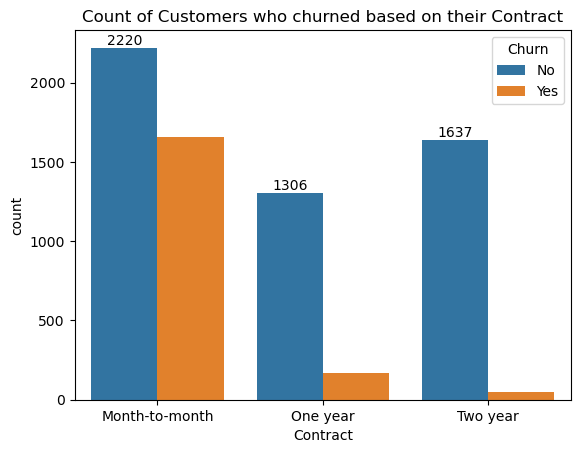

In [13]:
# Count plot of customers who churned based on their contract
ax = sns.countplot(x='Contract', data=data, hue='Churn')
ax.bar_label(ax.containers[0])
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.title('Count of Customers who churned based on their Contract')
plt.show()

**Insights from the plot:**
- Customers with shorter contract types tend to have a higher churn rate.
- The company should focus on extending contract durations, as longer contracts are associated with lower churn rates.


## Gender distribution and Churn Rate

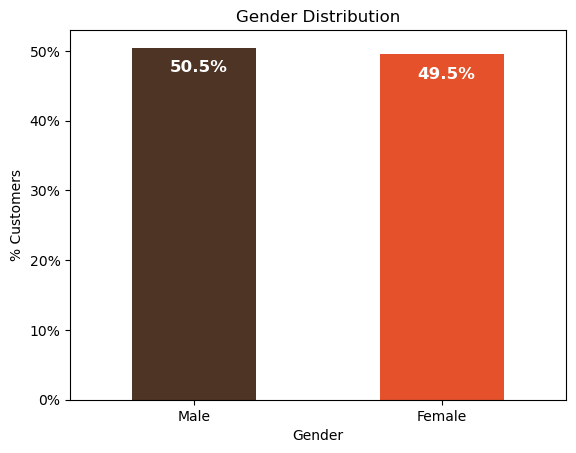

In [14]:
import matplotlib.ticker as mtick

colors = ['#4D3425','#E4512B']
ax = (data['gender'].value_counts()*100.0 /len(data)).plot(kind='bar',
     stacked = True,
            rot = 0,
                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**Insights from the plot:**
- About half of the customers are male while the other half are female

gender
Female    26.959518
Male      26.204565
Name: Churn, dtype: float64


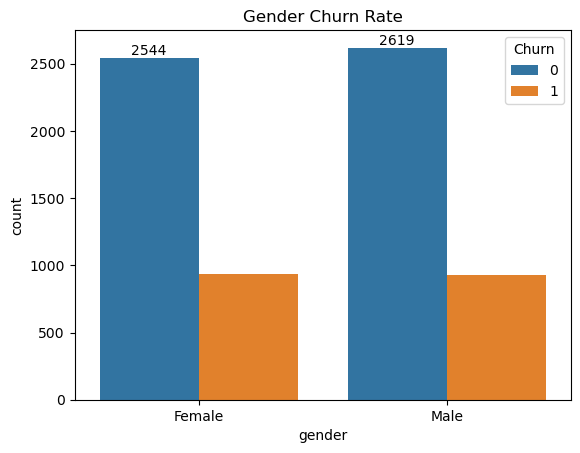

In [15]:
# Calculate the churn rate by gender
gender_churn_rate = data.groupby('gender')['Churn'].mean() * 100
print(gender_churn_rate)
ax = sns.countplot(x='gender', data=data, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Gender Churn Rate')
plt.show()

**Insights from the plot:**
- There is only a slight difference in the churn rate between genders.
- Both genders exhibit the same likelihood of churning.

## Subplots

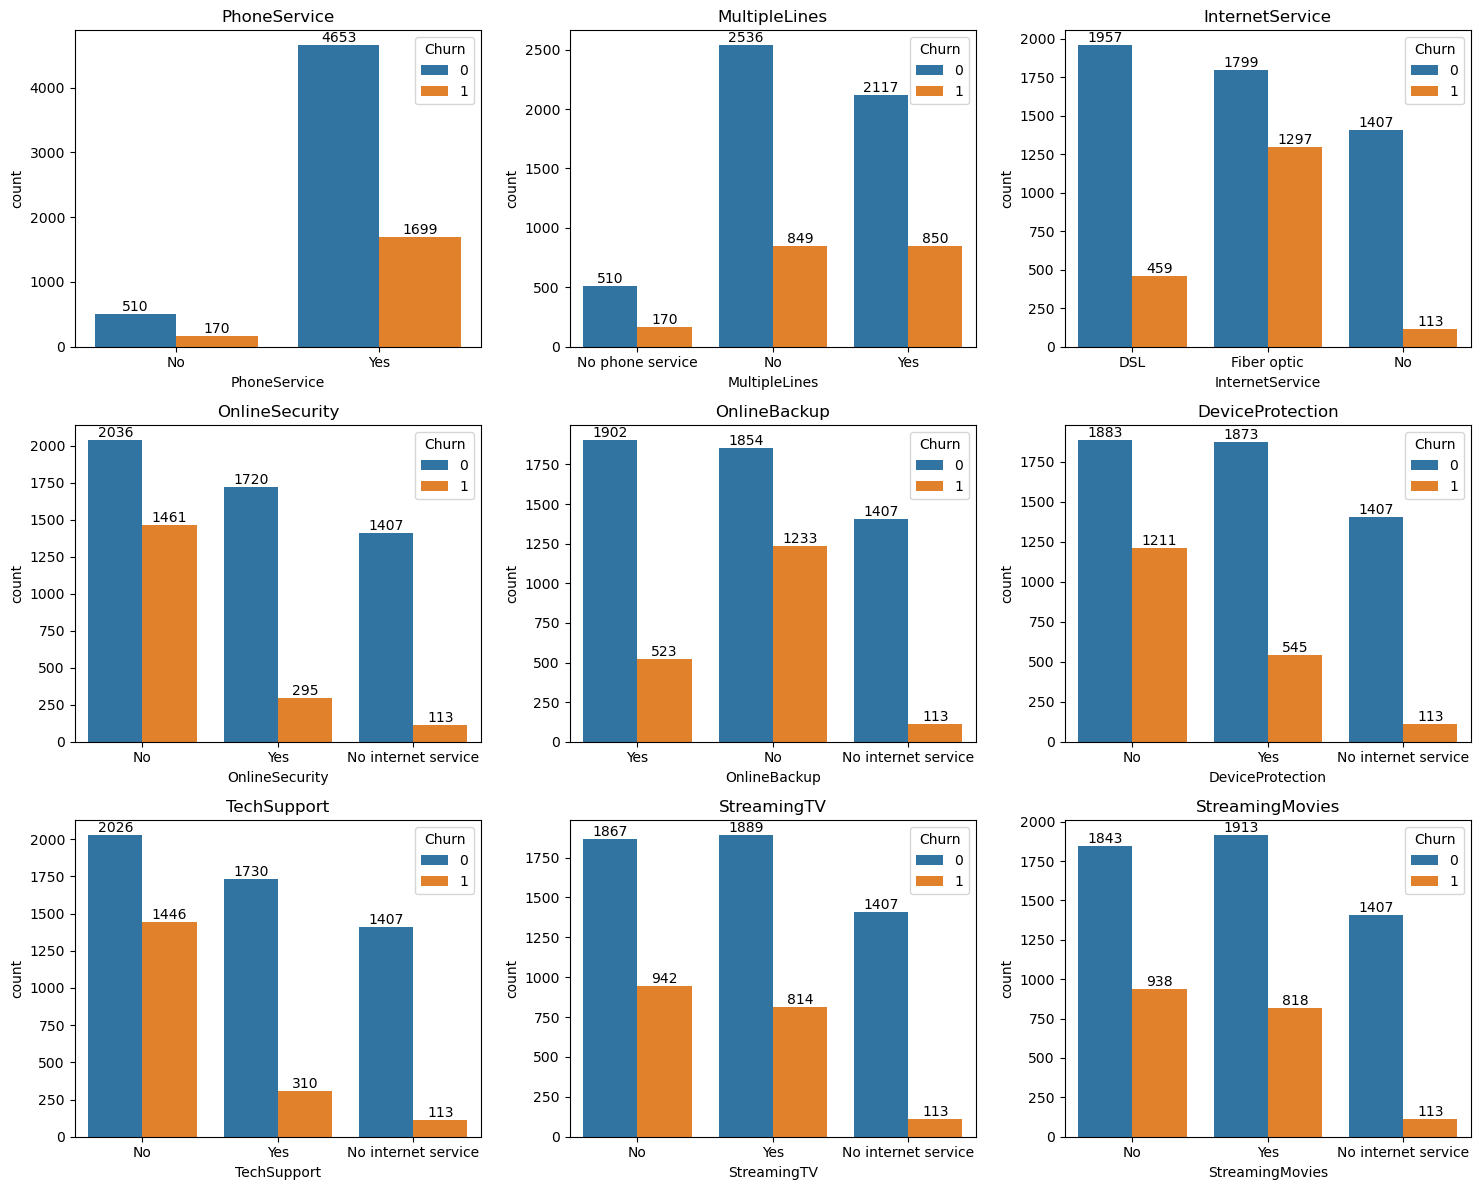

In [16]:
# Count plot by the following services
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, item in enumerate(services):
    row, col = divmod(i, 3)
    ax = sns.countplot(x=item, hue='Churn', data=data, ax=axes[row, col])
    ax.set_title(item)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

plt.tight_layout()
plt.show()

**Analysis of each subplot:**

#### 1. **Phone Service**:
   - Most customers have phone service, with a higher count of customers who did not churn compared to those who did.
   - Customers without phone service also show fewer churn instances.

#### 2. **Multiple Lines**:
   - The churn rates are similar for customers with or without multiple lines.
   - Customers with no phone service have the lowest churn numbers (similar to the "Phone Service" plot).

#### 3. **Internet Service**:
   - Customers using fiber-optic internet have a much higher churn rate compared to DSL users.
   - Those without internet service have the lowest churn numbers.

#### 4. **Online Security**:
   - Customers without online security have a significantly higher churn rate compared to those with online security.
   - Customers with no internet service show no significant churn impact.

#### 5. **Online Backup**:
   - Similar to online security, customers without online backup have higher churn rates.
   - Those with online backup services have lower churn rates.

#### 6. **Device Protection**:
   - Customers without device protection are more likely to churn compared to those with device protection.

### 7. **Tech Support**:
   - Customers without tech support have significantly higher churn rates compared to those who have tech support.

### 8. **Streaming TV**:
   - Customers who subscribe to streaming TV services show slightly lower churn rates compared to those without.

#### 9. **Streaming Movies**:
   - A similar pattern is observed with streaming movies; customers without these services have higher churn rates.

### Key Insights:
1. **Internet Services**:
   - Fiber-optic users show a higher churn rate. The company might need to investigate service quality or pricing for fiber-optic customers.
   - Customers without online security, backup, or tech support are more likely to churn. Providing bundled services could reduce churn.

2. **Phone Services**:
   - Churn rates are relatively consistent for customers with or without multiple lines.
   - Customers without phone services have the lowest churn, but they are also fewer in number.

3. **Streaming Services**:
   - Customers using streaming services (TV and movies) churn less, indicating that offering entertainment options might improve retention.


## Churn by Tenure

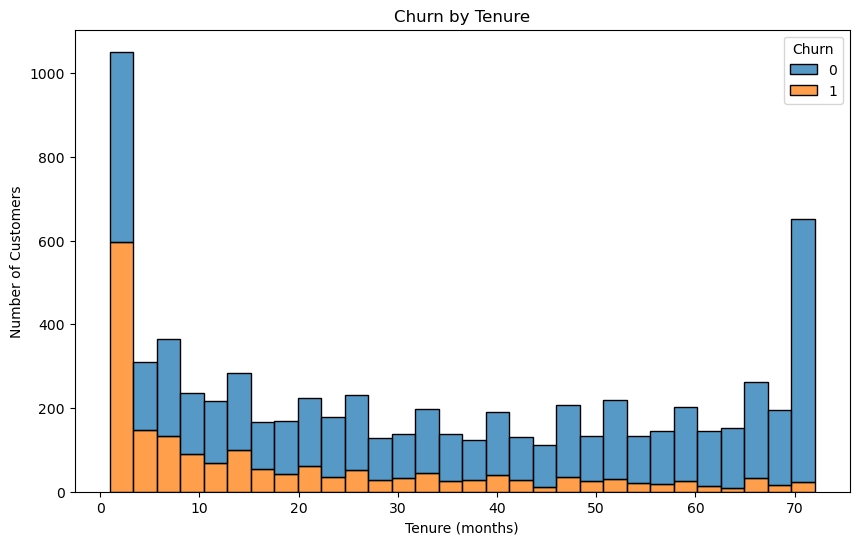

In [17]:
# Count plot of customers who churned based on their tenure
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', bins=30)
ax.set_title('Churn by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

**Insights from the plot:**
- Customers with shorter tenure (less than 10 months) have a higher churn rate.
- As tenure increases, the number of customers who churn decreases.
- Customers with longer tenure (more than 60 months) are less likely to churn.
- This indicates that customers who stay longer with the company are more loyal and less likely to leave.

## Relationship between monthly charge and total charge

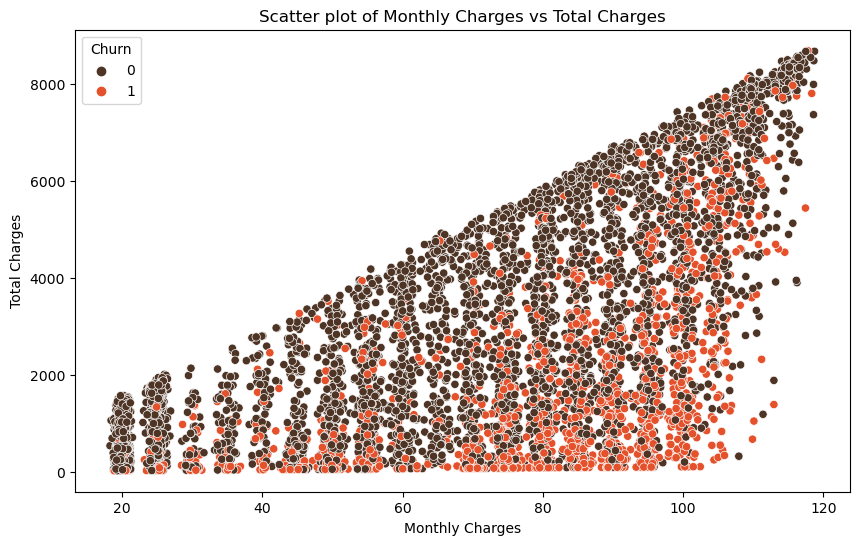

In [18]:
# Scatter plot of MonthlyCharges and TotalCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=data, hue='Churn', palette=colors)
plt.title('Scatter plot of Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

**Insights from plot:**

- As monthly charges increases total charges increases.

## Churned Customers by Payment method

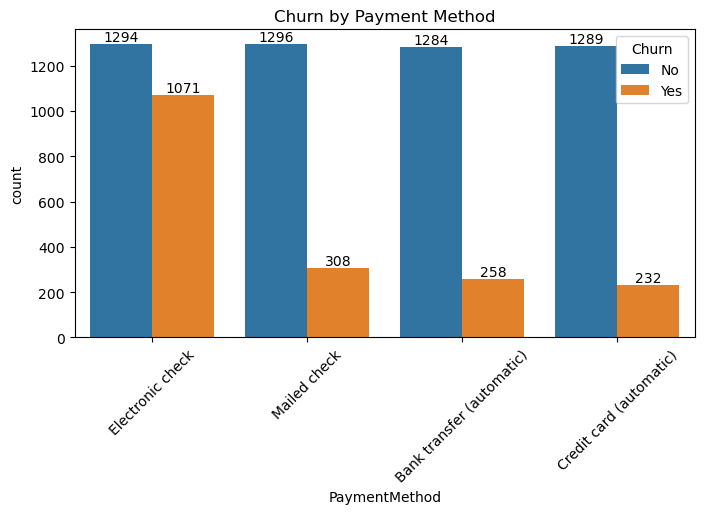

In [19]:
# Count plot of churn customers by payment method
plt.figure(figsize=(8,4))
ax = sns.countplot(x='PaymentMethod', data=data, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

**Insights from the plot:**

- Electronic Check: Customers paying through electronic checks are more likely to churn, suggesting potential dissatisfaction with this payment method or its associated processes.

- Automatic Payments (Bank Transfer and Credit Card): Automatic payment methods are associated with the lowest churn rates, possibly due to convenience and reliability.

- Mailed Check: While not as effective as automatic payment methods, churn rates for mailed checks are significantly lower than electronic checks.

**Recommendations:**

- Promote Automatic Payment Methods: Encourage customers to switch to automatic payment methods like bank transfers or credit cards, as these are linked to lower churn rates.
- Investigate Electronic Check Issues: Analyze why electronic check users have higher churn rates and address any pain points, such as complexity, delays, or fees.
- Incentivize Retention: Offer loyalty rewards or discounts for customers using high-risk payment methods like electronic checks to reduce churn.

### Paperless Billing

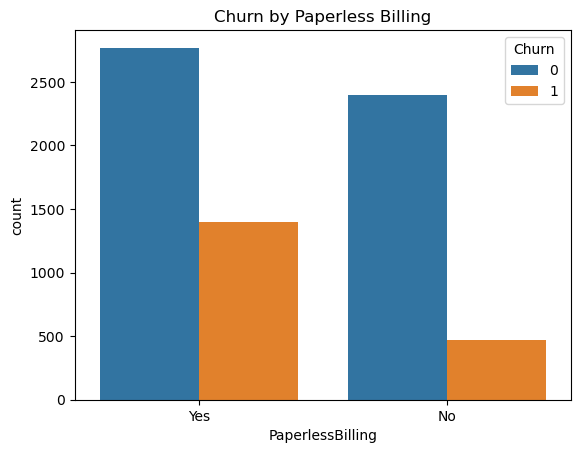

In [20]:
# Count plot of churn customers by paperless billing
sns.countplot(x='PaperlessBilling', data=data, hue='Churn')
plt.title('Churn by Paperless Billing')
plt.show()

**Insights:**

Customers with paper billing are likely to churn

## Developing Predictive Modeling and comparing them

### Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# We will use the data frame where we had created dummy variables
X = data_dummies.drop(columns='Churn')
y = data_dummies['Churn']

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


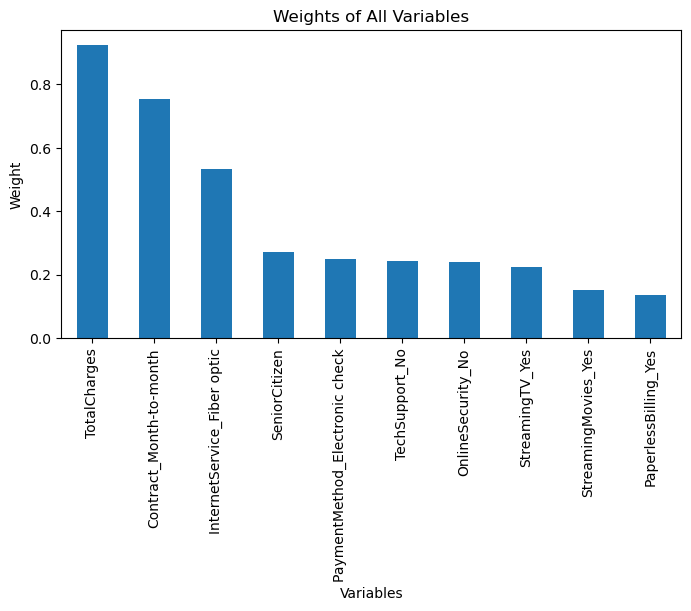

In [22]:
# Get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns)

# Plot the weights
plt.figure(figsize=(8, 4))
weights.sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Weights of All Variables')
plt.xlabel('Variables')
plt.ylabel('Weight')
plt.show()

###  Insights


1. **TotalCharges (~0.9)**: This is the most significant predictor of customer churn. Higher total charges are strongly associated with customers leaving.
2. **Contract_Month-to-month (~0.7)**: Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts.
3. **InternetService_Fiber optic (~0.5)**: Customers using fiber optic internet service have a higher likelihood of churning.
4. **SeniorCitizen (~0.3)**: Being a senior citizen increases the probability of churn.
5. **PaymentMethod_Electronic check (~0.25)**: Customers who use electronic checks are more likely to churn.
6. **TechSupport_No (~0.2)**: Lack of technical support is associated with a higher likelihood of churn.
7. **OnlineSecurity_No (~0.2)**: Customers without online security are more prone to churn.
8. **StreamingTV_Yes (~0.15)**: Using streaming TV services has a moderate association with churn.
9. **StreamingMovies_Yes (~0.1)**: Similar to streaming TV, using streaming movie services moderately increases the likelihood of churn.
10. **PaperlessBilling_Yes (~0.05)**: This has the least impact on churn among the listed variables, but still contributes.

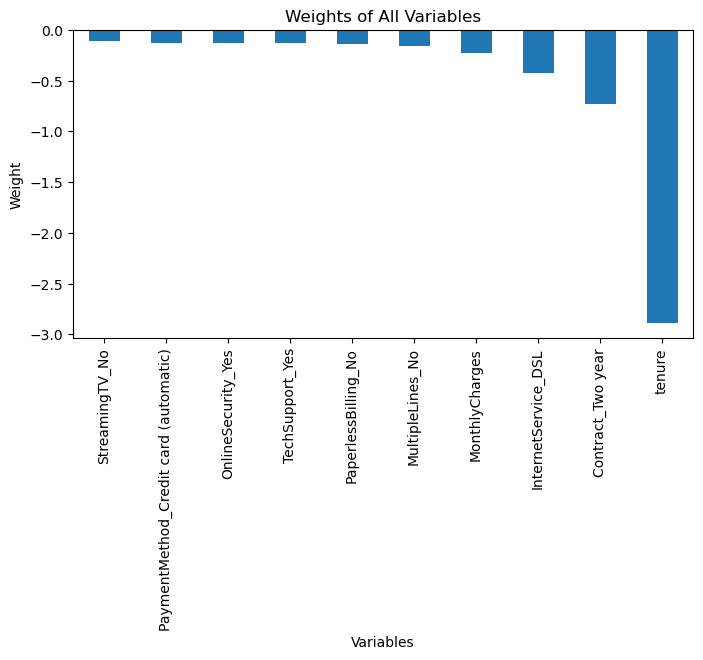

In [23]:
# Get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns)

# Plot the weights
plt.figure(figsize=(8, 4))
weights.sort_values(ascending=False)[-10:].plot(kind='bar')
plt.title('Weights of All Variables')
plt.xlabel('Variables')
plt.ylabel('Weight')
plt.show()

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize the RandomForestClassifier with corrected max_features parameter
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt",
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


<Axes: >

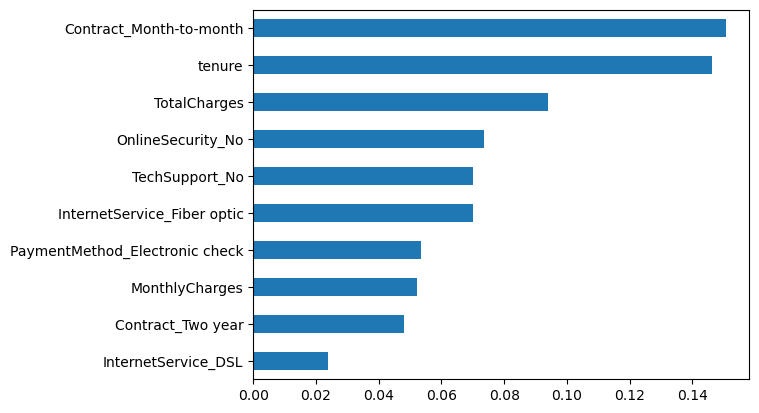

In [25]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### Observations

Based on the random forest algorithm, the key predictor variables for customer churn are monthly contract, tenure, and total charges. These variables stand out as the most significant in determining the likelihood of churn.

Interestingly, the findings from the random forest algorithm align closely with those from the logistic regression model and match our expectations from the Exploratory Data Analysis (EDA). This consistency across different analytical approaches reinforces the importance of these variables in predicting customer churn.

## Support Vecor Machine (SVM)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [27]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[953  89]
 [164 201]]


## ADA Boost

In [28]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

## XG Boost

In [31]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8059701492537313

The SVM (Support Vector Machine) model stands out as the top predictive model, boasting an impressive accuracy rate of 82%.

## Conclusions, General Insights and Recommendation

The analysis of the telecom churn dataset has provided valuable insights into the factors influencing customer churn. Here are the key takeaways:


1. **Churn Rate**:
    - Approximately 26% of customers have churned, while 74% have remained loyal.

2. **Demographics**:
    - Only 16% of the customers are senior citizens, and they are less likely to churn compared to younger customers.
    - Gender does not significantly impact churn rates, as both males and females exhibit similar churn behavior.

3. **Contract Type**:
    - Customers with month-to-month contracts have a higher churn rate compared to those with one-year or two-year contracts.
    - Longer contracts are associated with lower churn rates.

4. **Service Usage**:
    - Customers without online security, online backup, or tech support are more likely to churn.
    - Fiber-optic internet users have a higher churn rate compared to DSL users.
    - Customers using streaming services (TV and movies) tend to churn less.

5. **Payment Methods**:
    - Customers paying through electronic checks are more likely to churn.
    - Automatic payment methods (bank transfer and credit card) are associated with lower churn rates.

6. **Billing**:
    - Paperless billing has a slight impact on churn, with customers using paperless billing being slightly more likely to churn.

### Recommendations

1. **Incentivize Long-term Contracts**:
    - Offer attractive incentives for customers to switch from month-to-month contracts to longer-term contracts, such as reduced rates or added services.

2. **Enhance Service Quality**:
    - Investigate and address issues related to fiber-optic service quality or pricing to reduce churn among these customers.
    - Improve technical support services and consider offering them as part of the service package or at a discounted rate.
    - Include online security and backup services in bundled packages or offer them at reduced costs to increase uptake and satisfaction.

3. **Promote Convenient Payment Methods**:
    - Encourage the use of more convenient payment methods like automatic bank transfers or credit cards instead of electronic checks.

4. **Targeted Campaigns for Senior Citizens**:
    - Develop marketing and service initiatives specifically tailored to senior citizens, addressing their unique needs and preferences.

5. **Optimize Streaming Services**:
    - Ensure that streaming TV and movie services are reliable, offer a wide range of content, and meet customer expectations to reduce churn.

6. **Implement Loyalty Programs**:
    - Offer discounts, rewards, or special offers to customers with high total charges to encourage them to stay.

7. **Promote Paperless Billing**:
    - While it has a slight impact, promoting paperless billing can still be beneficial for cost-saving and environmental reasons, which can improve overall customer satisfaction.

By focusing on these key areas, you can develop targeted strategies to retain customers and reduce churn effectively.